<a href="https://colab.research.google.com/github/harrythedreamer/Delivery_Time_Prediction/blob/main/Delivery_Time_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

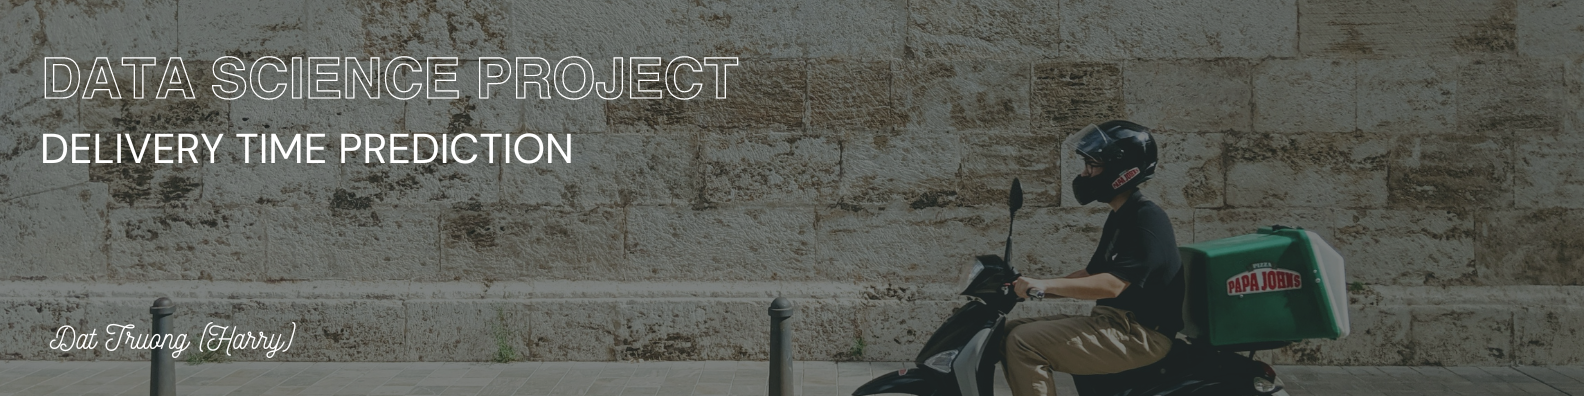

# ✅ **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install pycaret
from pycaret.regression import RegressionExperiment

from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# ✅ **Load and Understand Data**

In [ ]:
from google.colab import files
files.upload()

In [ ]:
df_train = pd.read_csv('train.csv')
df_train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [ ]:
df_train.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [ ]:
df_train.shape

(45593, 20)

In [ ]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant_latitude,45593.0,17.017729,8.185109,-30.905562,12.933284,18.546947,22.728163,30.914057
Restaurant_longitude,45593.0,70.231332,22.883647,-88.366217,73.170000,75.898497,78.044095,88.433452
Delivery_location_latitude,45593.0,17.465186,7.335122,0.010000,12.988453,18.633934,22.785049,31.054057
Delivery_location_longitude,45593.0,70.845702,21.118812,0.010000,73.280000,76.002574,78.107044,88.563452
Vehicle_condition,45593.0,1.023359,0.839065,0.000000,0.000000,1.000000,2.000000,3.000000


In [ ]:
df_train.describe(exclude=np.number).T

,count,unique,top,freq
ID,45593,45593,0x4607,1
Delivery_person_ID,45593,1320,PUNERES01DEL01,67
Delivery_person_Age,45593,23,35,2262
Delivery_person_Ratings,45593,29,4.8,7148
Order_Date,45593,44,15-03-2022,1192
Time_Orderd,45593,177,NaN,1731
Time_Order_picked,45593,193,21:30:00,496
Weatherconditions,45593,7,conditions Fog,7654
Road_traffic_density,45593,5,Low,15477
Type_of_order,45593,4,Snack,11533


In [ ]:
for column in df_train.columns:
    print(column)
    print(df_train[column].value_counts())
    print("------------------------------------")

ID
0x4607     1
0x1f3e     1
0xe251     1
0x3f31     1
0x4a78     1
          ..
0xc3f1     1
0x5db7     1
0x1985     1
0xceda     1
0x5fb2     1
Name: ID, Length: 45593, dtype: int64
------------------------------------
Delivery_person_ID
PUNERES01DEL01     67
JAPRES11DEL02      67
HYDRES04DEL02      66
JAPRES03DEL01      66
VADRES11DEL02      66
                   ..
DEHRES18DEL03       7
AURGRES11DEL03      7
KOLRES09DEL03       6
KOCRES16DEL03       6
BHPRES010DEL03      5
Name: Delivery_person_ID, Length: 1320, dtype: int64
------------------------------------
Delivery_person_Age
35      2262
36      2260
37      2227
30      2226
38      2219
24      2210
32      2202
22      2196
29      2191
33      2187
28      2179
25      2174
34      2166
26      2159
21      2153
27      2150
39      2144
20      2136
31      2120
23      2087
NaN     1854
50        53
15        38
Name: Delivery_person_Age, dtype: int64
------------------------------------
Delivery_person_Ratings
4.8     

In [ ]:
df_train.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

In [ ]:
df_train.duplicated().sum()

0

**▶ Column Explanation**

- **ID**: Unique key of deliveries
- **Delivery_person_ID**: Code of the delivery person
- **Delivery_person_Ratings**: Ratings of the delivery person, which reflects the quality of his/her service
- **Restaurant_latitude**: The latitude of restaurant
- **Restaurant_longitude**: The longitude of restaurant, whose combination with Restaurant_latitude determines the location
- **Delivery_location_latitude**: The latitude of destination (customer's place)
- **Delivery_location_longitude**: The longitude of destination, whose combination with Delivery_location_latitude determines the location
- **Order_Date**: Date of order
- **Time_Orderd**: Ordered time
- **Time_Order_picked**: Picked-up time. Noted that this can be on the different date from ordered date (midnight orders)
- **Weatherconditions**: Weather conditions during the delivery time
- **Road_traffic_density**: Traffic density during the delivery time
- **Vehicle_condition**: The contemporary condition of the vehicle which reflects its quality and impacts pick-up time and delivery time
- **Type_of_order**: Which kind of food is delivered: drinks, snack, etc. This partly determines preparation time and delivery time.
- **Type_of_vehicle**: Different vehecle types have different speed
- **multiple_deliveries**: Determines whether this order is delivered with others or not. A multiple delivery takes more time than a single one
- **Festival**: Determines whether there is a festival in the delivery area or not. Festival may impact the availability of delivery service, road traffic, prepation time, etc.
- **City**: Type of city (metropolitian, urban, or semi-urban)
- **Time_taken(min)**: Delivery time - the target variable in this project

**▶ Observations**

- Both **numeric and categorical features** are present
- There are some **unnecessary columns** for the Supervised Learning process: ID, Delivery_person_ID
- Some columns require data formatting: **Weatherconditions**, **Time_taken(min)**
- Some variables should be created based on available columns: **Distance from restaurant to destination** (based on Restaurant_latitude, Restaurant_longitude, Delivery_location_latitude, Delivery_location_longitude), **Preparation time** (based on Time_Ordered, Time_Order_picked)
- There are **null values** across table but they are currently a string which should be transformed for identification

# ✅ **Clean Data**

In [ ]:
def transform_null(data):

  data = data.copy()

  data.replace('NaN ', pd.NA, inplace=True)
  data['Weatherconditions'].replace('conditions NaN', pd.NA, inplace=True)

  return data

df_train2 = transform_null(df_train)

In [ ]:
df_train2.isna().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

**▶ Define a function for data transformation**

In [ ]:
def transform_dataframe(data):

  # Convert necessary columns to numeric format
  data['Delivery_person_Age'] = pd.to_numeric(data['Delivery_person_Age'], errors='coerce')
  data['Delivery_person_Ratings'] = pd.to_numeric(data['Delivery_person_Ratings'], errors='coerce')
  data['Vehicle_condition'] = pd.to_numeric(data['Vehicle_condition'], errors='coerce')
  data['multiple_deliveries'] = pd.to_numeric(data['multiple_deliveries'], errors='coerce')

  data = data.rename(columns={'Time_Orderd': 'Time_Ordered'})

  #Convert necessary columns to datetime format
  data['Order_Date'] = pd.to_datetime(data['Order_Date']).dt.date
  data['Time_Ordered'] = pd.to_datetime(data['Time_Ordered']).dt.time
  data['Time_Order_picked'] = pd.to_datetime(data['Time_Order_picked']).dt.time

  # Remove necessary part of columns
  data['Weatherconditions'] = data['Weatherconditions'].str.replace('conditions ','', regex=False)
  data['Time_taken(min)'] = pd.to_numeric(data['Time_taken(min)'].str.extract(r'(\d+)', expand=False), errors='coerce')

  # Calculate the distance between restaurant and destination
  from geopy.distance import geodesic
  def calculate_distance(row):
    restaurant_coords = (row['Restaurant_latitude'], row['Restaurant_longitude'])
    delivery_coords = (row['Delivery_location_latitude'], row['Delivery_location_longitude'])
    distance = geodesic(restaurant_coords, delivery_coords).kilometers
    return distance

  data['distance(km)'] = data.apply(calculate_distance, axis=1)

  # Drop rows with null values in 'Time_Ordered' column
  data.dropna(subset=['Time_Ordered'], inplace=True)

  # Get the Picked-up date as it can be different from the Ordered date
  data['Pick_date'] = data.apply(
      lambda row: row['Order_Date'] + pd.DateOffset(1)
      if pd.notna(row['Time_Ordered']) > pd.notna(row['Time_Order_picked'])
      else row['Order_Date'], axis=1)

  data['Datetime_Ordered'] = pd.to_datetime(data['Order_Date'].astype(str) + ' ' + data['Time_Ordered'].astype(str))
  data['Datetime_Picked'] = pd.to_datetime(data['Pick_date'].astype(str) + ' ' + data['Time_Order_picked'].astype(str))

  # Calculate the Preparation Time of the order
  data['Time_Order_prepared'] = (data['Datetime_Picked'] - data['Datetime_Ordered']).dt.total_seconds() / 60.0

  # Get the hour and minute
  data['Ordered_hour'] = data['Datetime_Ordered'].apply(lambda x: x.hour)
  data['Ordered_minute'] = data['Datetime_Ordered'].apply(lambda x: x.minute)
  data['Picked_hour'] = data['Datetime_Picked'].apply(lambda x: x.hour)
  data['Picked_minute'] = data['Datetime_Picked'].apply(lambda x: x.minute)

  # Get the day, month, and weekdate
  data['Order_day'] = data['Datetime_Ordered'].dt.day
  data['Order_month'] = data['Datetime_Ordered'].dt.month
  data['Order_weekdate'] = data['Datetime_Ordered'].dt.day_name()

  return data

df_train3 = transform_dataframe(df_train2)
df_train3.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Ordered,...,Datetime_Ordered,Datetime_Picked,Time_Order_prepared,Ordered_hour,Ordered_minute,Picked_hour,Picked_minute,Order_day,Order_month,Order_weekdate
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,...,2022-03-19 11:30:00,2022-03-19 11:45:00,15.0,11,30,11,45,19,3,Saturday
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,...,2022-03-25 19:45:00,2022-03-25 19:50:00,5.0,19,45,19,50,25,3,Friday
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,...,2022-03-19 08:30:00,2022-03-19 08:45:00,15.0,8,30,8,45,19,3,Saturday
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-05-04,18:00:00,...,2022-05-04 18:00:00,2022-05-04 18:10:00,10.0,18,0,18,10,4,5,Wednesday
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,...,2022-03-26 13:30:00,2022-03-26 13:45:00,15.0,13,30,13,45,26,3,Saturday


**▶ Define another function to transform the predict data (without the target - Time_taken(min))**

In [ ]:
def transform_dataframe_without_target(data):

  data['Delivery_person_Age'] = pd.to_numeric(data['Delivery_person_Age'], errors='coerce')
  data['Delivery_person_Ratings'] = pd.to_numeric(data['Delivery_person_Ratings'], errors='coerce')
  data['Vehicle_condition'] = pd.to_numeric(data['Vehicle_condition'], errors='coerce')
  data['multiple_deliveries'] = pd.to_numeric(data['multiple_deliveries'], errors='coerce')

  data = data.rename(columns={'Time_Orderd': 'Time_Ordered'})

  data['Order_Date'] = pd.to_datetime(data['Order_Date']).dt.date
  data['Time_Ordered'] = pd.to_datetime(data['Time_Ordered']).dt.time
  data['Time_Order_picked'] = pd.to_datetime(data['Time_Order_picked']).dt.time

  data['Weatherconditions'] = data['Weatherconditions'].str.replace('conditions ','', regex=False)

  from geopy.distance import geodesic
  def calculate_distance(row):
    restaurant_coords = (row['Restaurant_latitude'], row['Restaurant_longitude'])
    delivery_coords = (row['Delivery_location_latitude'], row['Delivery_location_longitude'])
    distance = geodesic(restaurant_coords, delivery_coords).kilometers
    return distance

  data['distance(km)'] = data.apply(calculate_distance, axis=1)

  data.dropna(subset=['Time_Ordered'], inplace=True)

  data['Pick_date'] = data.apply(
      lambda row: row['Order_Date'] + pd.DateOffset(1)
      if pd.notna(row['Time_Ordered']) > pd.notna(row['Time_Order_picked'])
      else row['Order_Date'], axis=1)

  data['Datetime_Ordered'] = pd.to_datetime(data['Order_Date'].astype(str) + ' ' + data['Time_Ordered'].astype(str))
  data['Datetime_Picked'] = pd.to_datetime(data['Pick_date'].astype(str) + ' ' + data['Time_Order_picked'].astype(str))

  data['Time_Order_prepared'] = (data['Datetime_Picked'] - data['Datetime_Ordered']).dt.total_seconds() / 60.0


  data['Ordered_hour'] = data['Datetime_Ordered'].apply(lambda x: x.hour)
  data['Ordered_minute'] = data['Datetime_Ordered'].apply(lambda x: x.minute)
  data['Picked_hour'] = data['Datetime_Picked'].apply(lambda x: x.hour)
  data['Picked_minute'] = data['Datetime_Picked'].apply(lambda x: x.minute)

  data['Order_day'] = data['Datetime_Ordered'].dt.day
  data['Order_month'] = data['Datetime_Ordered'].dt.month
  data['Order_weekdate'] = data['Datetime_Ordered'].dt.day_name()

  return data

In [ ]:
df_train3.isna().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age             214
Delivery_person_Ratings         268
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Ordered                      0
Time_Order_picked                 0
Weatherconditions                 0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             943
Festival                        219
City                           1144
Time_taken(min)                   0
distance(km)                      0
Pick_date                         0
Datetime_Ordered                  0
Datetime_Picked                   0
Time_Order_prepared               0
Ordered_hour                      0
Ordered_minute                    0
Picked_hour                 

**▶ Visualize columns containing nulls**

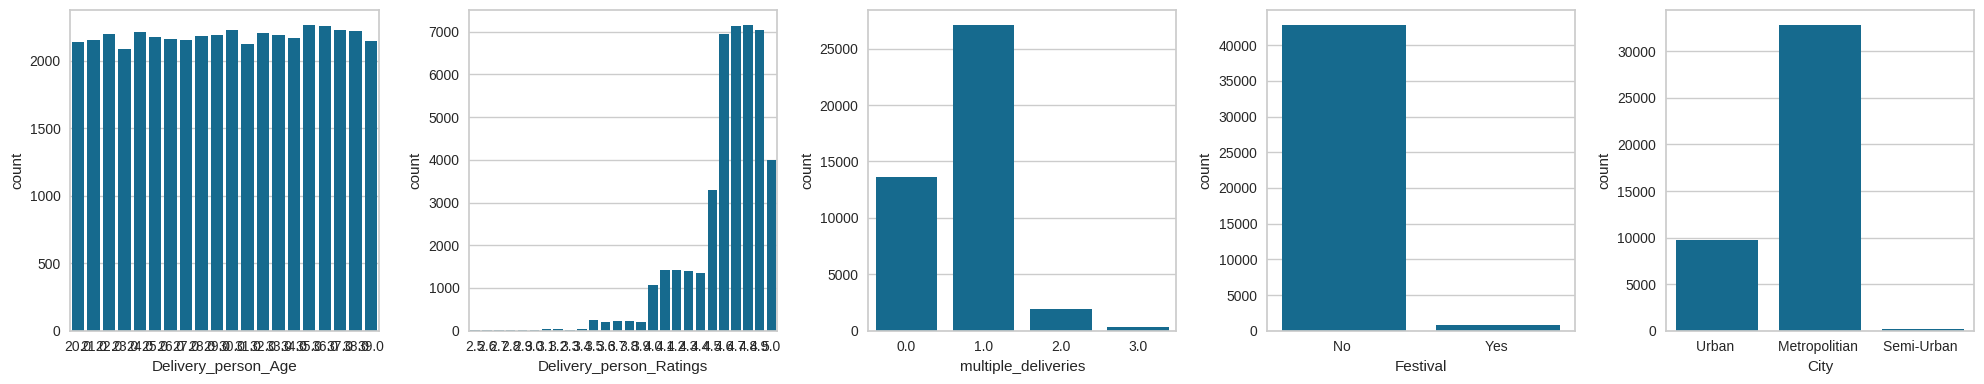

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

sns.countplot(data=df_train3, x='Delivery_person_Age', ax=axes[0])
sns.countplot(data=df_train3, x='Delivery_person_Ratings', ax=axes[1])
sns.countplot(data=df_train3, x='multiple_deliveries', ax=axes[2])
sns.countplot(data=df_train3, x='Festival', ax=axes[3])
sns.countplot(data=df_train3, x='City', ax=axes[4])

plt.tight_layout()
plt.show()

**▶ Define a function for null filling**

In [ ]:
columns_fill_mean = ['Delivery_person_Age', 'Delivery_person_Ratings']
columns_fill_mode = ['multiple_deliveries', 'Festival', 'City']

def transform_fill_null(data):

  data = data.copy()

  for column in columns_fill_mean:
    mean_value = data[column].mean()
    data[column].fillna(mean_value, inplace=True)

  for column in columns_fill_mode:
    mode_value = data[column].mode().iloc[0]
    data[column].fillna(mode_value, inplace=True)

  return data

df_train4 = transform_fill_null(df_train3)
df_train4.isna().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Ordered                   0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
distance(km)                   0
Pick_date                      0
Datetime_Ordered               0
Datetime_Picked                0
Time_Order_prepared            0
Ordered_hour                   0
Ordered_minute                 0
Picked_hour                    0
Picked_minute                  0
Order_day                      0
Order_mont

In [ ]:
columns_to_keep = [
    'Delivery_person_Age'
    , 'Delivery_person_Ratings'
    , 'Order_day'
    , 'Order_month'
    , 'Order_weekdate'
    , 'Ordered_hour'
    , 'Ordered_minute'
    , 'Picked_hour'
    , 'Picked_minute'
    , 'Time_Order_prepared'
    , 'distance(km)'
    , 'Type_of_order'
    , 'Type_of_vehicle'
    , 'multiple_deliveries'
    , 'City'
    , 'Festival'
    , 'Weatherconditions'
    , 'Road_traffic_density'
    , 'Vehicle_condition'
    , 'Time_taken(min)'
]

df_train5 = df_train4[columns_to_keep]
df_train5.head()

,Delivery_person_Age,Delivery_person_Ratings,Order_day,Order_month,Order_weekdate,Ordered_hour,Ordered_minute,Picked_hour,Picked_minute,Time_Order_prepared,distance(km),Type_of_order,Type_of_vehicle,multiple_deliveries,City,Festival,Weatherconditions,Road_traffic_density,Vehicle_condition,Time_taken(min)
0,37.0,4.9,19,3,Saturday,11,30,11,45,15.0,3.020737,Snack,motorcycle,0.0,Urban,No,Sunny,High,2,24
1,34.0,4.5,25,3,Friday,19,45,19,50,5.0,20.143737,Snack,scooter,1.0,Metropolitian,No,Stormy,Jam,2,33
2,23.0,4.4,19,3,Saturday,8,30,8,45,15.0,1.549693,Drinks,motorcycle,1.0,Urban,No,Sandstorms,Low,0,26
3,38.0,4.7,4,5,Wednesday,18,0,18,10,10.0,7.774497,Buffet,motorcycle,1.0,Metropolitian,No,Sunny,Medium,0,21
4,32.0,4.6,26,3,Saturday,13,30,13,45,15.0,6.197898,Snack,scooter,1.0,Metropolitian,No,Cloudy,High,1,30


In [ ]:
columns_to_keep_without_target = [
    'Delivery_person_Age'
    , 'Delivery_person_Ratings'
    , 'Order_day'
    , 'Order_month'
    , 'Order_weekdate'
    , 'Ordered_hour'
    , 'Ordered_minute'
    , 'Picked_hour'
    , 'Picked_minute'
    , 'Time_Order_prepared'
    , 'distance(km)'
    , 'Type_of_order'
    , 'Type_of_vehicle'
    , 'multiple_deliveries'
    , 'City'
    , 'Festival'
    , 'Weatherconditions'
    , 'Road_traffic_density'
    , 'Vehicle_condition'
]

In [ ]:
target = 'Time_taken(min)'

numeric_features = [
    'Delivery_person_Age'
    , 'Delivery_person_Ratings'
    , 'Order_day'
    , 'Order_month'
    , 'Ordered_hour'
    , 'Ordered_minute'
    , 'Picked_hour'
    , 'Picked_minute'
    , 'Time_Order_prepared'
    , 'distance(km)'
    , 'multiple_deliveries'
    , 'Vehicle_condition'
]

categorical_features = list(df_train5.drop(columns=numeric_features + [target], axis=1).columns)

# **✅ Quick EDA (Exploratory Data Analysis)**

**▶ Plotting histogram of numeric variables**

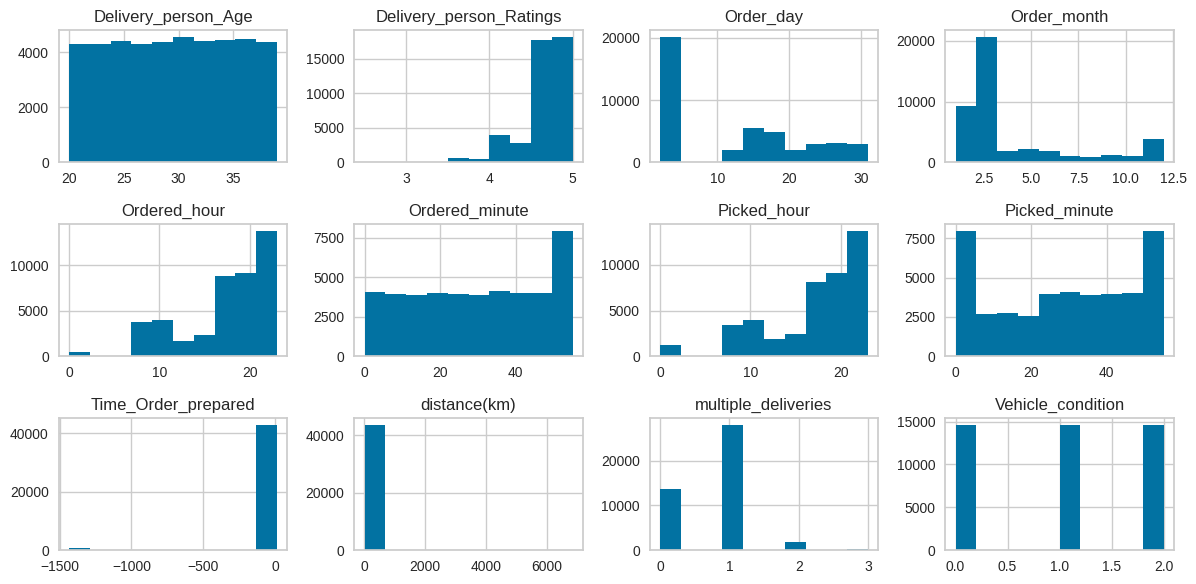

In [ ]:
df_train5[numeric_features].hist(layout=(3,4), figsize=(12,6))
plt.tight_layout()

<Axes: xlabel='distance(km)'>

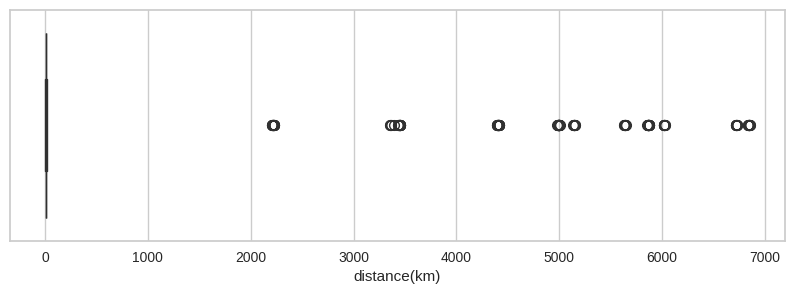

In [ ]:
plt.figure(figsize=(10,3))
sns.boxplot(x=df_train5['distance(km)'])

<Axes: xlabel='distance(km)', ylabel='Time_taken(min)'>

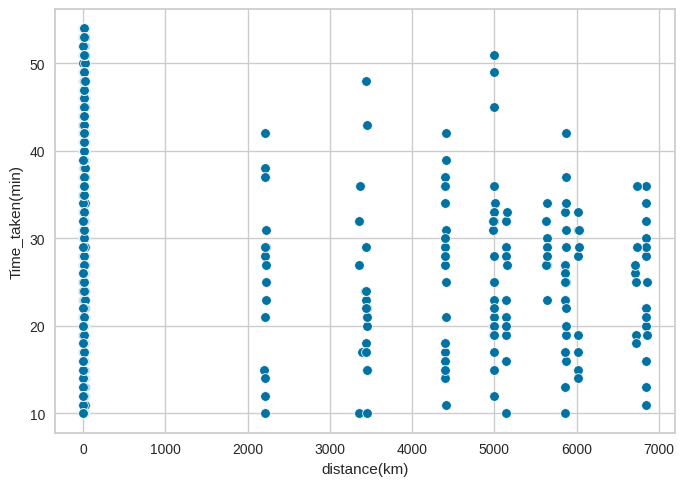

In [ ]:
sns.scatterplot(x='distance(km)', y='Time_taken(min)', data=df_train5)

**❌❌❌ Delivering food over a distance of 2000 km in less than an hour using two-wheelers is an impractical and unrealistic proposition**

**❌❌❌ There are some negative values in Time_Order_Prapared**

**▶ Define a function to deal with ouliers**

In [ ]:
def transform_outliers(data):
  data = data[(data['distance(km)'] < 1000)&(data['Time_Order_prepared'] > 0)]
  return data

df_train6 = transform_outliers(df_train5)

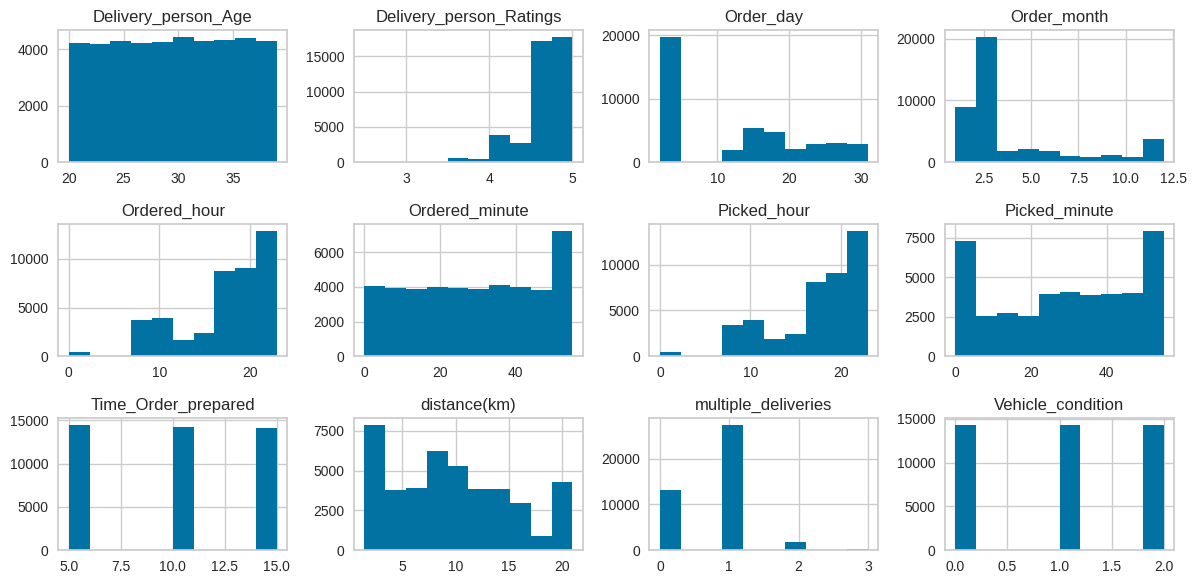

In [ ]:
df_train6[numeric_features].hist(layout=(3,4), figsize=(12,6))
plt.tight_layout()

**▶ Checking the correlation between numeric variables and target**

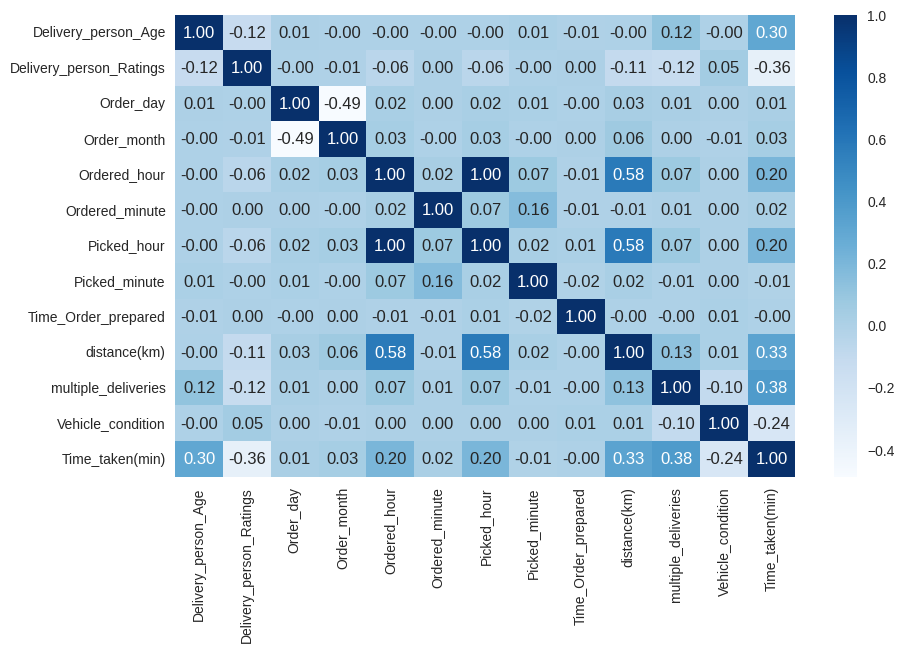

In [ ]:
data_for_heatmap = df_train6[numeric_features + [target]]

correlation_matrix = data_for_heatmap.corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.show()

❌❌❌ **Order_day, Order_month, Ordered_minute, Picked_minute, Time_Order_prepared are likely to have no significant impact on target**

▶ **Update columns**

In [ ]:
numeric_features = [
    'Delivery_person_Age'
    , 'Delivery_person_Ratings'
    , 'Ordered_hour'
    , 'Picked_hour'
    , 'distance(km)'
    , 'multiple_deliveries'
    , 'Vehicle_condition'
]

df_train6 = df_train6.drop(columns=['Order_day', 'Order_month', 'Ordered_minute', 'Picked_minute', 'Time_Order_prepared'], axis=1)

In [ ]:
columns_to_keep_without_target = [
    'Delivery_person_Age'
    , 'Delivery_person_Ratings'
    , 'Order_day'
    , 'Order_month'
    , 'Order_weekdate'
    , 'Ordered_hour'
    , 'Ordered_minute'
    , 'Picked_hour'
    , 'Picked_minute'
    , 'Time_Order_prepared'
    , 'distance(km)'
    , 'Type_of_order'
    , 'Type_of_vehicle'
    , 'multiple_deliveries'
    , 'City'
    , 'Festival'
    , 'Weatherconditions'
    , 'Road_traffic_density'
    , 'Vehicle_condition'
]

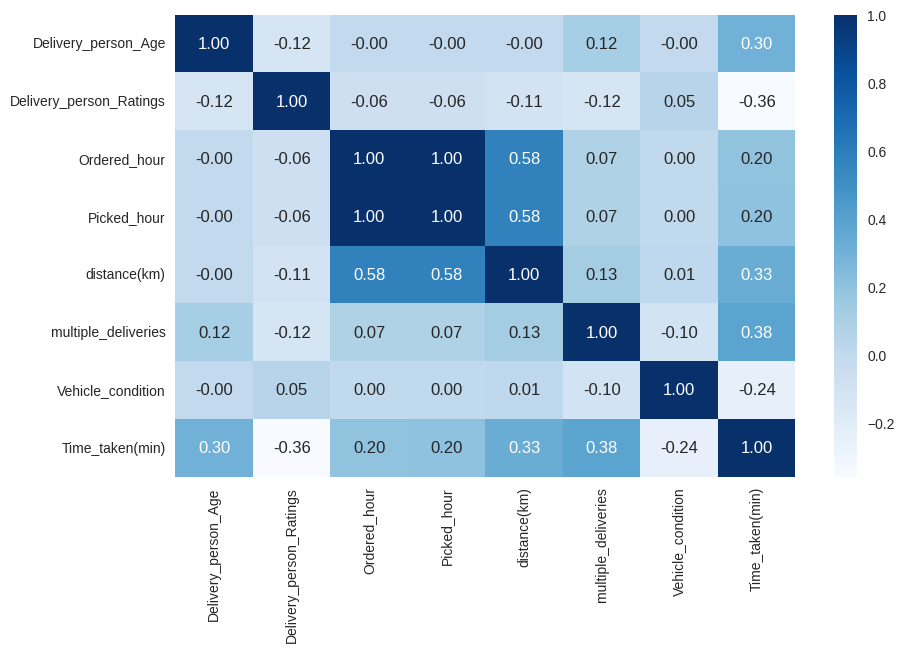

In [ ]:
data_for_heatmap = df_train6[numeric_features + [target]]

correlation_matrix = data_for_heatmap.corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.show()

▶ **Plotting bar chart of categorical variables**

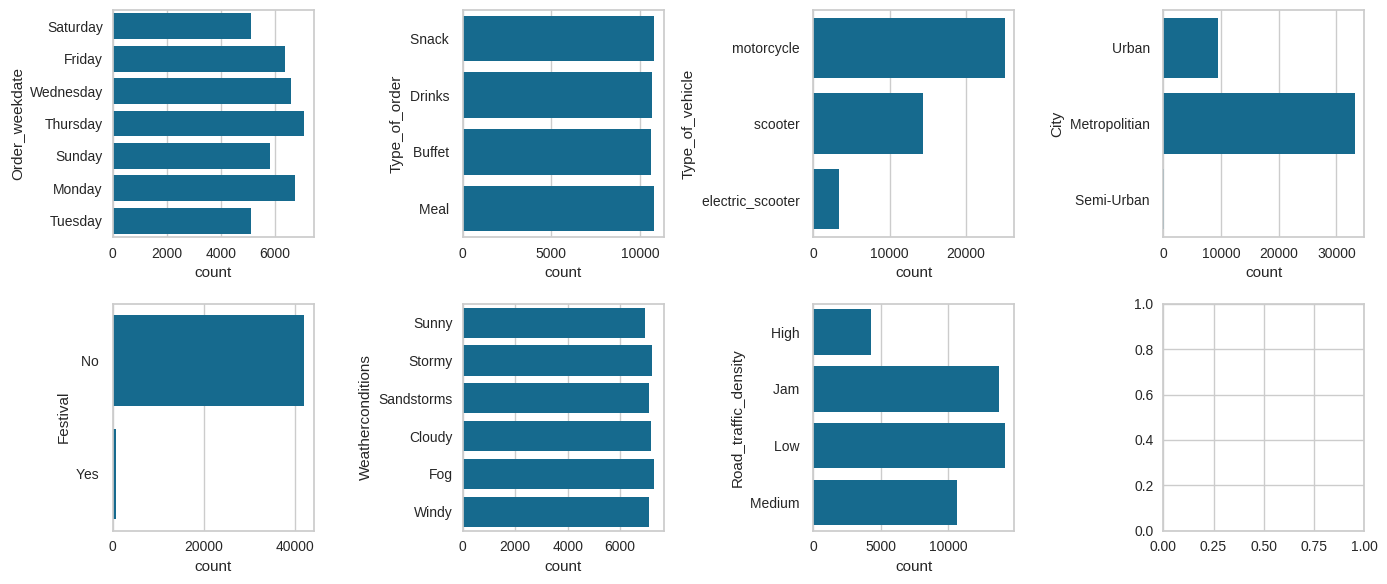

In [ ]:
num_rows = (len(categorical_features) + 1) // 3

fig, axes = plt.subplots(num_rows, 4, figsize=(14, 3 * num_rows))

axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(data=df_train6, y=feature, ax=axes[i])

plt.tight_layout()

▶ **Plotting distribution of target across categorical variables**

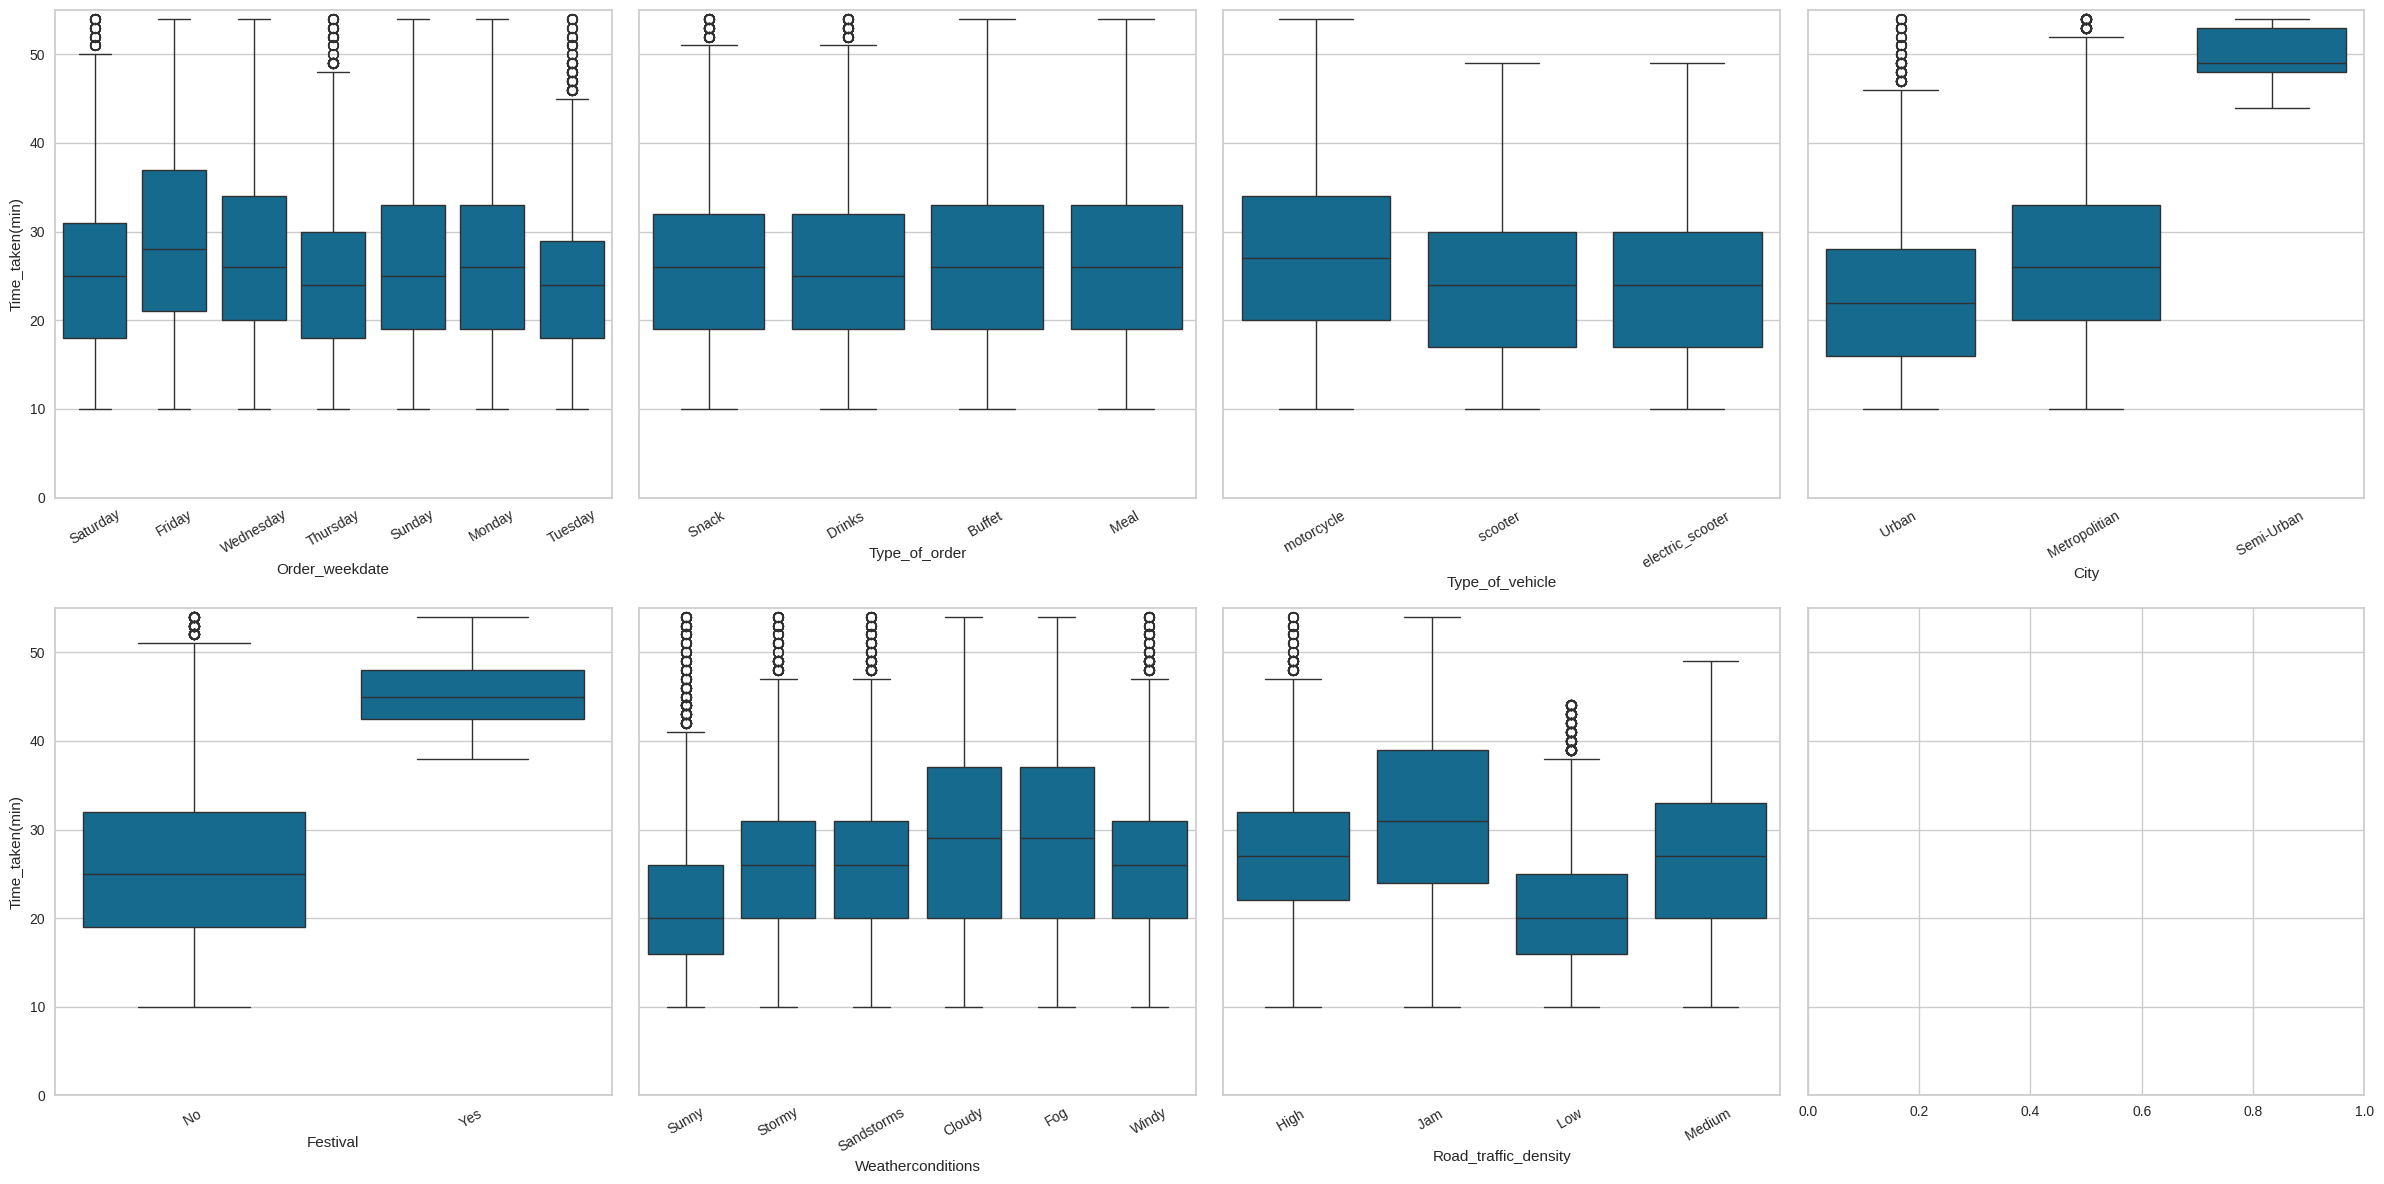

In [ ]:
fig, ax = plt.subplots(2,4, figsize=(24,12), sharey=True)

row,col = 0,0

for feature in categorical_features:
    sns.boxplot(data=df_train6, x=feature, y=target, ax=ax[row,col])
    ax[row,col].set_ylim([0,55])
    xlabels = ax[row,col].get_xticklabels()
    ax[row,col].set_xticklabels(xlabels, rotation=30)

    if col < 3:
        col += 1
    else:
        row += 1
        col = 0

plt.tight_layout()
plt.show()

# ✅ **Work with Pycaret**

In [ ]:
exp = RegressionExperiment()
type(exp)

pycaret.regression.oop.RegressionExperiment

In [ ]:
# initiate setup on exp

exp.setup(df_train6, target=target, numeric_features=numeric_features, categorical_features=categorical_features, session_id=123)

,Description,Value
0,Session id,123
1,Target,Time_taken(min)
2,Target type,Regression
3,Original data shape,"(42877, 15)"
4,Transformed data shape,"(42877, 36)"
5,Transformed train set shape,"(30013, 36)"
6,Transformed test set shape,"(12864, 36)"
7,Numeric features,7
8,Categorical features,7
9,Preprocess,True


In [ ]:
# compare baseline models

best = exp.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,3.0483,14.2621,3.7761,0.8389,0.1561,0.1326,3.1140
rf,Random Forest Regressor,3.1052,15.0307,3.8765,0.8302,0.1598,0.1344,17.6050
xgboost,Extreme Gradient Boosting,3.1131,15.0480,3.8788,0.8300,0.1595,0.1347,0.8670
et,Extra Trees Regressor,3.1283,15.4404,3.9292,0.8255,0.1618,0.1353,17.6620
gbr,Gradient Boosting Regressor,3.5228,19.2119,4.3826,0.7830,0.1829,0.1563,3.7820
dt,Decision Tree Regressor,4.0549,27.9753,5.2885,0.6839,0.2183,0.1739,0.5800
ada,AdaBoost Regressor,4.5357,30.3428,5.5083,0.6572,0.2334,0.2125,2.5740
knn,K Neighbors Regressor,4.5826,34.0110,5.8313,0.6158,0.2292,0.1985,0.8940
lar,Least Angle Regression,4.7713,35.7294,5.9769,0.5963,0.2460,0.2121,0.4940
br,Bayesian Ridge,4.7714,35.7297,5.9769,0.5963,0.2460,0.2121,0.5300


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
lightgbm_model = exp.create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.0804,14.4115,3.7963,0.8394,0.1587,0.1347
1,2.9934,13.6952,3.7007,0.8508,0.1529,0.1301
2,3.1231,14.5908,3.8198,0.8383,0.1570,0.1350
3,3.0677,14.6362,3.8257,0.8326,0.1554,0.1315
4,3.1109,14.9363,3.8648,0.8336,0.1613,0.1366
5,3.0321,14.1542,3.7622,0.8402,0.1540,0.1314
6,3.0408,14.3804,3.7921,0.8369,0.1558,0.1315
7,3.0000,14.0290,3.7455,0.8388,0.1546,0.1301
8,2.9616,13.3595,3.6551,0.8424,0.1532,0.1299


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
holdout_pred = exp.predict_model(lightgbm_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,3.0267,14.0491,3.7482,0.8392,0.1532,0.1300


In [ ]:
holdout_pred.head()

,Delivery_person_Age,Delivery_person_Ratings,Order_weekdate,Ordered_hour,Picked_hour,distance(km),Type_of_order,Type_of_vehicle,multiple_deliveries,City,Festival,Weatherconditions,Road_traffic_density,Vehicle_condition,Time_taken(min),prediction_label
40829,27.0,5.0,Monday,23,23,4.464402,Snack,scooter,0.0,Urban,No,Sunny,Low,1,23,17.062429
40574,37.0,4.7,Thursday,19,19,9.043193,Buffet,scooter,1.0,Metropolitian,No,Stormy,Jam,2,25,29.111102
31838,32.0,4.0,Friday,18,18,16.577705,Meal,motorcycle,2.0,Metropolitian,No,Fog,Medium,1,39,39.191517
6782,26.0,4.8,Tuesday,17,17,7.747886,Meal,scooter,1.0,Metropolitian,No,Windy,Medium,2,26,23.972451
35634,39.0,4.4,Saturday,17,18,12.438828,Snack,electric_scooter,0.0,Metropolitian,No,Sandstorms,Medium,2,31,35.812686


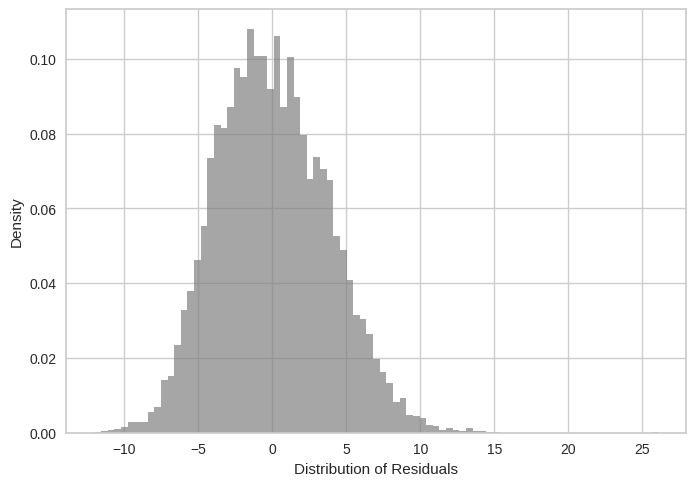

In [ ]:
holdout_pred['residuals'] = holdout_pred['Time_taken(min)'] - holdout_pred['prediction_label']

import matplotlib.pyplot as plt

plt.hist(holdout_pred['residuals'], bins='auto', density=True, color='grey', alpha=0.7)
plt.xlabel('Distribution of Residuals')
plt.ylabel('Density')
plt.show()

▶ **Load and clean the predict data**

In [ ]:
# import predict data
files.upload()

In [ ]:
df_predict = pd.read_csv('predict.csv')
df_predict.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,15:05:00,conditions NaN,NaN,3,Drinks,electric_scooter,1,No,Metropolitian
1,0x3474,BANGRES15DEL01,28,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30:00,20:35:00,conditions Windy,Jam,0,Snack,motorcycle,1,No,Metropolitian
2,0x9420,JAPRES09DEL03,23,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35:00,19:45:00,conditions Stormy,Jam,0,Drinks,motorcycle,1,No,Metropolitian
3,0x72ee,JAPRES07DEL03,21,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15:00,17:20:00,conditions Fog,Medium,1,Meal,scooter,1,No,Metropolitian
4,0xa759,CHENRES19DEL01,31,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25:00,18:40:00,conditions Sunny,Medium,2,Drinks,scooter,1,No,Metropolitian


In [ ]:
def transform_outliers_new(data):
  data = data[data['distance(km)'] < 1000]
  return data

In [ ]:
df_predict2 = transform_null(df_predict)
df_predict3 = transform_dataframe_without_target(df_predict2)
df_predict4 = transform_fill_null(df_predict3)
df_predict5 = df_predict4[columns_to_keep_without_target]
df_predict6 = transform_outliers(df_predict5)
df_predict6.head()
df_predict6 = df_predict6.drop(columns=['Order_day', 'Order_month', 'Ordered_minute', 'Picked_minute', 'Time_Order_prepared'], axis=1)

▶ **Make Prediction**

In [ ]:
predictions_pycaret = exp.predict_model(lightgbm_model, data = df_predict6)
predictions_pycaret.head()

,Delivery_person_Age,Delivery_person_Ratings,Order_weekdate,Ordered_hour,Picked_hour,distance(km),Type_of_order,Type_of_vehicle,multiple_deliveries,City,Festival,Weatherconditions,Road_traffic_density,Vehicle_condition,prediction_label
1,28.0,4.6,Tuesday,20,20,17.042984,Snack,motorcycle,1.0,Metropolitian,No,Windy,Jam,0,30.658779
2,23.0,4.5,Monday,19,19,13.390474,Drinks,motorcycle,1.0,Metropolitian,No,Stormy,Jam,0,30.461126
3,21.0,4.8,Friday,17,17,13.397932,Meal,scooter,1.0,Metropolitian,No,Fog,Medium,1,32.041284
4,31.0,4.6,Sunday,18,18,17.042633,Drinks,scooter,1.0,Metropolitian,No,Sunny,Medium,2,22.505894
5,26.0,4.7,Tuesday,9,9,1.541060,Drinks,motorcycle,1.0,Metropolitian,No,Fog,Low,0,19.096164


▶ **Save the Pycaret Experiment pipeline**

In [ ]:
# Save model (pipeline)
exp.save_model(best, 'time_delivery_pred_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Delivery_person_Age',
                                              'Delivery_person_Ratings',
                                              'Ordered_hour', 'Picked_hour',
                                              'distance(km)',
                                              'multiple_deliveries',
                                              'Vehicle_condition'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Order_weekdate', 'Type_of_order',
                                              'Type_o...
                                              'Weatherconditions',
                                              'Road_traffic_density'],
                                     transformer=OneHotEncoder(cols=['Order_weekdate',
                               

In [ ]:
# Load pipeline
exp.load_model('time_delivery_pred_pipeline')

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Delivery_person_Age',
                                             'Delivery_person_Ratings',
                                             'Ordered_hour', 'Picked_hour',
                                             'distance(km)',
                                             'multiple_deliveries',
                                             'Vehicle_condition'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Order_weekdate', 'Type_of_ord...
                                             'Weatherconditions',
                                             'Road_traffic_density'],
                                    transformer=OneHotEncoder(cols=['Order_weekdate',
                                                                    'Type_of_order',
                                                                    'Type_of_vehicle',
                                                                    'City',
                                                                    'Weatherconditions',
                                                                    'Road_traffic_density'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model', LGBMRegressor(n_jobs=-1, random_state=123))])

# ✅ **Build a LightGBM Model**

In [ ]:
df_train6.head()

,Delivery_person_Age,Delivery_person_Ratings,Order_weekdate,Ordered_hour,Picked_hour,distance(km),Type_of_order,Type_of_vehicle,multiple_deliveries,City,Festival,Weatherconditions,Road_traffic_density,Vehicle_condition,Time_taken(min)
0,37.0,4.9,Saturday,11,11,3.020737,Snack,motorcycle,0.0,Urban,No,Sunny,High,2,24
1,34.0,4.5,Friday,19,19,20.143737,Snack,scooter,1.0,Metropolitian,No,Stormy,Jam,2,33
2,23.0,4.4,Saturday,8,8,1.549693,Drinks,motorcycle,1.0,Urban,No,Sandstorms,Low,0,26
3,38.0,4.7,Wednesday,18,18,7.774497,Buffet,motorcycle,1.0,Metropolitian,No,Sunny,Medium,0,21
4,32.0,4.6,Saturday,13,13,6.197898,Snack,scooter,1.0,Metropolitian,No,Cloudy,High,1,30


**1. Data Preprocessing**

In [ ]:
df_train6_copy = df_train6.copy()

# scaling numeric features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_train6_copy[numeric_features] = scaler.fit_transform(df_train6_copy[numeric_features])

# encoding categorical features
df_train6_copy = pd.get_dummies(df_train6_copy, columns=categorical_features)

df_train6_copy.describe().T


,count,mean,std,min,25%,50%,75%,max
Delivery_person_Age,42877.0,1.218265e-15,1.000012,-1.661235,-0.791928,0.077379,0.946686,1.642131
Delivery_person_Ratings,42877.0,-1.290517e-15,1.000012,-6.864116,-0.435890,0.206933,0.849755,1.171167
Ordered_hour,42877.0,3.562905e-17,1.000012,-3.606809,-0.482310,0.350889,0.767489,1.184089
Picked_hour,42877.0,1.915683e-16,1.000012,-3.641611,-0.516963,0.316276,0.732896,1.149515
distance(km),42877.0,2.320031e-18,1.000012,-1.465951,-0.897291,-0.088756,0.711540,2.011925
multiple_deliveries,42877.0,2.883468e-17,1.000012,-1.321716,-1.321716,0.437222,0.437222,3.955098
Vehicle_condition,42877.0,-7.440672e-17,1.000012,-1.226754,-1.226754,-0.002142,1.222470,1.222470
Time_taken(min),42877.0,2.637374e+01,9.391675,10.000000,19.000000,26.000000,32.000000,54.000000
Order_weekdate_Friday,42877.0,1.484479e-01,0.355548,0.000000,0.000000,0.000000,0.000000,1.000000
Order_weekdate_Monday,42877.0,1.573804e-01,0.364163,0.000000,0.000000,0.000000,0.000000,1.000000


**2. Feature Engineering**

In [ ]:
# Splitting the Data:

from sklearn.model_selection import train_test_split

X = df_train6_copy.drop('Time_taken(min)', axis=1)
y = df_train6_copy['Time_taken(min)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**3. Training Model: LightGBM**

In [ ]:
# Building and Training the LightGBM Model

X_train.columns = X_train.columns.str.replace(' ', '_')
X_test.columns = X_test.columns.str.replace(' ', '_')

# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Define model parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Train the model
model = lgb.train(params, train_data, num_boost_round=100)

In [ ]:
# Making Predictions

y_pred = model.predict(X_test)

**4. Evaluating Model Performance**

In [ ]:
# Calculate MAE, MSE, RMSE, and R2
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')


Mean Absolute Error (MAE): 3.0777658847022016
Mean Squared Error (MSE): 14.603112079363889
Root Mean Squared Error (RMSE): 3.8214018474067717
R-squared (R2): 0.8377692206485734


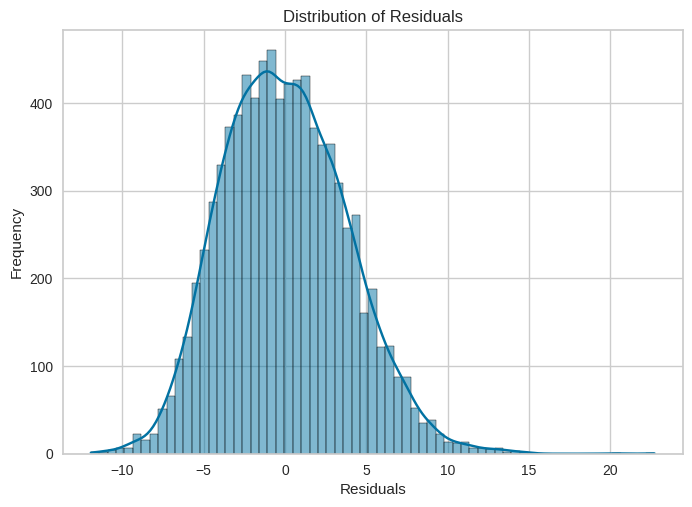

In [ ]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

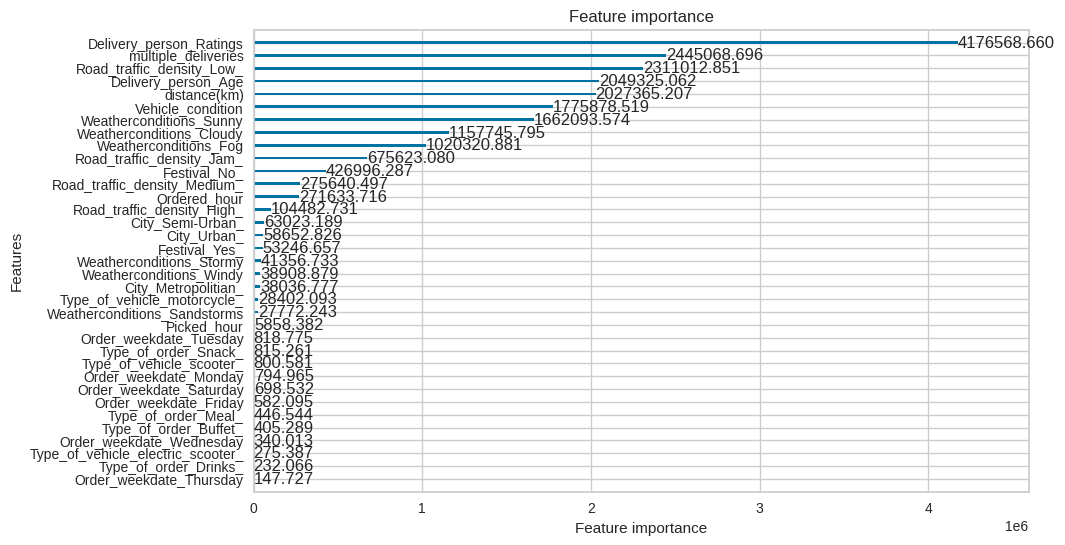

In [ ]:
lgb.plot_importance(model, importance_type='gain', figsize=(10,6))
plt.show()

**5. Fine-Tuning Model**

In [ ]:
param_grid = {
    'num_leaves': [20, 31, 40],
    'learning_rate': [0.01, 0.05, 0.1],
}

# Create a LightGBM estimator (not a trained model)
base_model = lgb.LGBMRegressor()

# Create GridSearchCV with the LightGBM estimator
grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=10)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


In [ ]:
# Print the best parameters
print("Best Parameters:", best_params)

Best Parameters: {'learning_rate': 0.1, 'num_leaves': 40}


In [ ]:
# Making Predictions

best_y_pred = best_model.predict(X_test)

In [ ]:
# Evaluating Model Performance

# Calculate MAE, MSE, RMSE, and R2
mae = mean_absolute_error(y_test, best_y_pred)
mse = mean_squared_error(y_test, best_y_pred)
rmse = mean_squared_error(y_test, best_y_pred, squared=False)
r2 = r2_score(y_test, best_y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 3.0055422432045207
Mean Squared Error (MSE): 13.895239521062162
Root Mean Squared Error (RMSE): 3.7276318918399336
R-squared (R2): 0.8456332099263835


**6. Feature Engineering (Predict Data)**

In [ ]:
# Preprocess predict data

df_predict6_copy = df_predict6.copy()

# scaling numeric features

scaler = StandardScaler()
df_predict6_copy[numeric_features] = scaler.fit_transform(df_predict6_copy[numeric_features])

# encoding categorical features
df_predict6_copy = pd.get_dummies(df_predict6_copy, columns=categorical_features)

df_predict6_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Delivery_person_Age,10716.0,8.641422e-16,1.000047,-1.656649,-0.785009,0.001285,0.783945,1.655586
Delivery_person_Ratings,10716.0,1.664298e-16,1.000047,-6.638265,-0.419695,0.202162,0.824019,1.134947
Ordered_hour,10716.0,1.644406e-16,1.000047,-3.598931,-0.485561,0.344671,0.759787,1.174903
Picked_hour,10716.0,-2.738467e-16,1.000047,-3.635631,-0.520107,0.310700,0.726103,1.141506
distance(km),10716.0,-3.514256e-17,1.000047,-1.469664,-0.899874,-0.089761,0.703485,2.015117
multiple_deliveries,10716.0,1.292981e-17,1.000047,-1.326532,-1.326532,0.428421,0.428421,3.938326
Vehicle_condition,10716.0,-7.293738e-17,1.000047,-1.233224,-1.233224,-0.009705,1.213814,1.213814
Order_weekdate_Friday,10716.0,1.432437e-01,0.350338,0.000000,0.000000,0.000000,0.000000,1.000000
Order_weekdate_Monday,10716.0,1.645203e-01,0.370764,0.000000,0.000000,0.000000,0.000000,1.000000
Order_weekdate_Saturday,10716.0,1.199141e-01,0.324876,0.000000,0.000000,0.000000,0.000000,1.000000


**7. Making Prediction**

In [ ]:
prediction_normal = best_model.predict(df_predict6_copy)

prediction_normal

array([30.43646533, 29.778379  , 30.93426622, ..., 29.03624186,
       26.72663756, 23.49186358])

**8. Save Model**

In [ ]:
# save model
import joblib

# Save the best_model
joblib.dump(best_model, 'best_model.joblib')

# Save the best_params dictionary for reference
joblib.dump(grid_search.best_params_, 'best_params.joblib')

['best_params.joblib']

In [ ]:
# Load the saved model
loaded_model = joblib.load('best_model.joblib')

# Load the best_params dictionary
loaded_best_params = joblib.load('best_params.joblib')

# **✅ Compare 2 Approaches: Pycaret and Model Building**

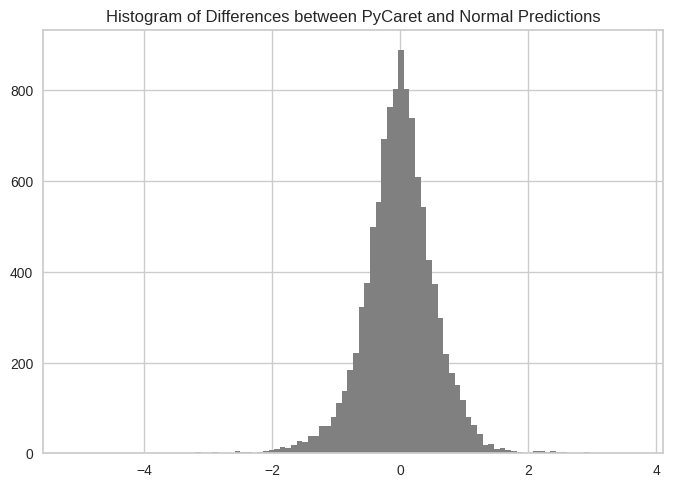

In [ ]:
compare_result_pycaret_normal = predictions_pycaret['prediction_label'] - prediction_normal

plt.hist(compare_result_pycaret_normal, bins=100, color='grey')
plt.title('Histogram of Differences between PyCaret and Normal Predictions')
plt.show()

**Export to a PDF file**

In [ ]:
!pip install nbconvert
!apt-get install texlive-xetex

In [ ]:
from google.colab import drive
import nbformat
from nbconvert import PDFExporter

# Mount Google Drive
drive.mount('/content/drive')

# Get the notebook name
notebook_name = 'Delivery_Time_Prediction.ipynb'

# Load the notebook
notebook_path = f'/content/drive/My Drive/Colab Notebooks/{notebook_name}'
with open(notebook_path) as f:
    notebook = nbformat.read(f, as_version=4)

# Configure PDF export
pdf_exporter = PDFExporter()
pdf_data, resources = pdf_exporter.from_notebook_node(notebook)

# Save PDF to Google Drive
pdf_path = f'/content/drive/My Drive/Colab Notebooks/{notebook_name.replace(".ipynb", ".pdf")}'
with open(pdf_path, 'wb') as f:
    f.write(pdf_data)

print(f'PDF saved to: {pdf_path}')


Mounted at /content/drive
PDF saved to: /content/drive/My Drive/Colab Notebooks/Delivery_Time_Prediction.pdf
